In [1]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from direct_decomposition import random_unitary
from simulation import run_interferom_simulation, dist_to_state, state_to_dist

In [2]:
# Make a random unitary R to simulate
R = random_unitary(2)
print(R)

[[-0.10496062-0.86611395j -0.26857503-0.40828586j]
 [ 0.38260121-0.30404968j -0.37007268+0.79007362j]]


# 3 photons (four qubit circuits)

<!-- (There's probably big potential to reduce circuit depth) -->

In [3]:
initial_dist = [3,0]
initial_state = "1100"
possible_dists = [[3,0], [0,3], [2,1], [1,2]] # Every configuration of 3 photons in two modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(dist, initial_dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'1100': 0.44100669015280103, '0011': 0.013622789157297322, '1001': 0.41511973930707263, '0110': 0.13025078138282872}


In [4]:
probs_1e3 = run_interferom_simulation(R, [3,0], 1e3)
probs_1e4 = run_interferom_simulation(R, [3,0], 1e4)
probs_1e5 = run_interferom_simulation(R, [3,0], 1e5)

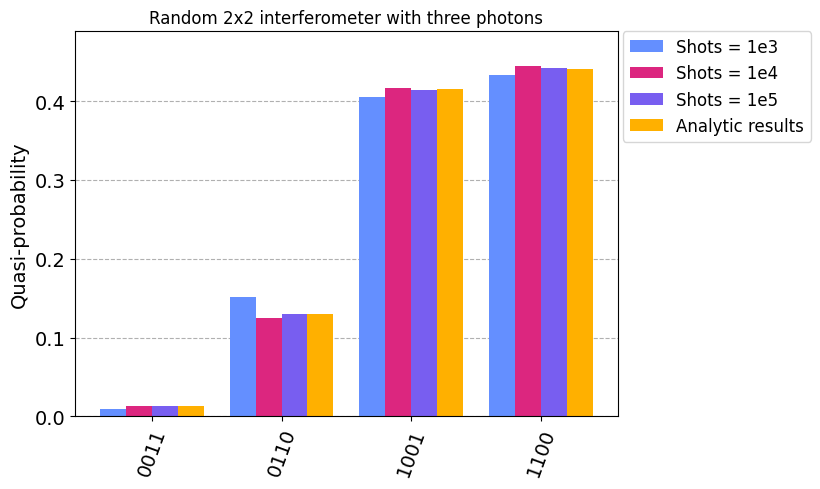

In [5]:
legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], legend=legend, 
               title='Random 2x2 interferometer with three photons', 
               bar_labels=False)

In [6]:
output_states = [[3,0],[0,3],[2,1],[1,2]]
for state in output_states:
    print(f"P {state} = {output_probability([3,0], state, R)}")

P [3, 0] = 0.44100669015280103
P [0, 3] = 0.013622789157297314
P [2, 1] = 0.41511973930707285
P [1, 2] = 0.13025078138282867


# 5 photons (6 qubit circuits)

In [7]:
initial_dist = [5,0]
initial_state = "101000"
possible_dists = [[5,0], [4,1], [3,2], [2,3], [1,4], [0,5]] # Every configuration of 5 photons in two modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(dist, initial_dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'101000': 0.2555104281758305, '100001': 0.4008534137272716, '011010': 0.2515489648606163, '010011': 0.07892770718113318, '001100': 0.01238244602660664, '000101': 0.0007770400285413436}


In [8]:
probs_1e3 = run_interferom_simulation(R, [5,0], 1e3)
probs_1e4 = run_interferom_simulation(R, [5,0], 1e4)
probs_1e5 = run_interferom_simulation(R, [5,0], 1e5)

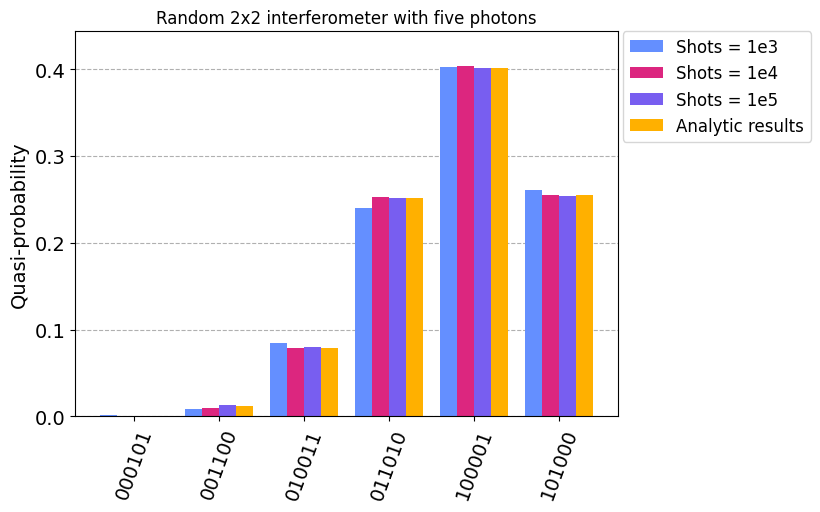

In [9]:
legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], legend=legend, 
               title='Random 2x2 interferometer with five photons', 
               bar_labels=False)